<a href="https://colab.research.google.com/github/Vaishnavi-Parashar/subscription-trap-analysis/blob/main/subscription_trap_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df=pd.read_csv('netflix_viewing.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India)


In [12]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [13]:
df_useful = df [['Profile Name','Start Time','Duration','Title','Device Type','Country']]
df_useful.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Device Type 1,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Device Type 1,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Device Type 1,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,Device Type 1,IN (India)


In [14]:
df_useful.columns = [
    'profile',
    'start_time',
    'duration',
    'title',
    'device_type',
    'country'
]

df_useful.head()


,profile,start_time,duration,title,device_type,country
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Device Type 1,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Device Type 1,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Device Type 1,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,Device Type 1,IN (India)


In [19]:
df_useful['duration_minutes'] = (
    pd.to_timedelta(df_useful['duration'])
    .dt.total_seconds()
    /60
)
df_useful[['duration','duration_minutes']].head()

/tmp/ipython-input-1613832521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['duration_minutes'] = (


,duration,duration_minutes
0,00:00:06,0.10
1,00:09:39,9.65
2,00:00:06,0.10
3,00:00:15,0.25
4,00:01:45,1.75


In [20]:
df_useful = df_useful[df_useful['duration_minutes'] >= 1]

df_useful.shape


(7076, 7)

In [21]:
total_minutes=df_useful['duration_minutes'].sum()
total_minutes

np.float64(148159.0)

In [22]:
total_hours=total_minutes/60
total_hours

np.float64(2469.3166666666666)

In [24]:
top_title =(
    df_useful.groupby('title')['duration_minutes']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_title

,duration_minutes
title,
Minnal Murali,1618.366667
CBI 5: The Brain,1206.033333
Jana Gana Mana,921.716667
Kuttavum Shikshayum,724.683333
Kumari,684.816667
Doctor (Tamil),625.950000
Gangubai Kathiawadi,560.883333
Kurup (Malayalam),541.766667
Don't Look Up,535.450000


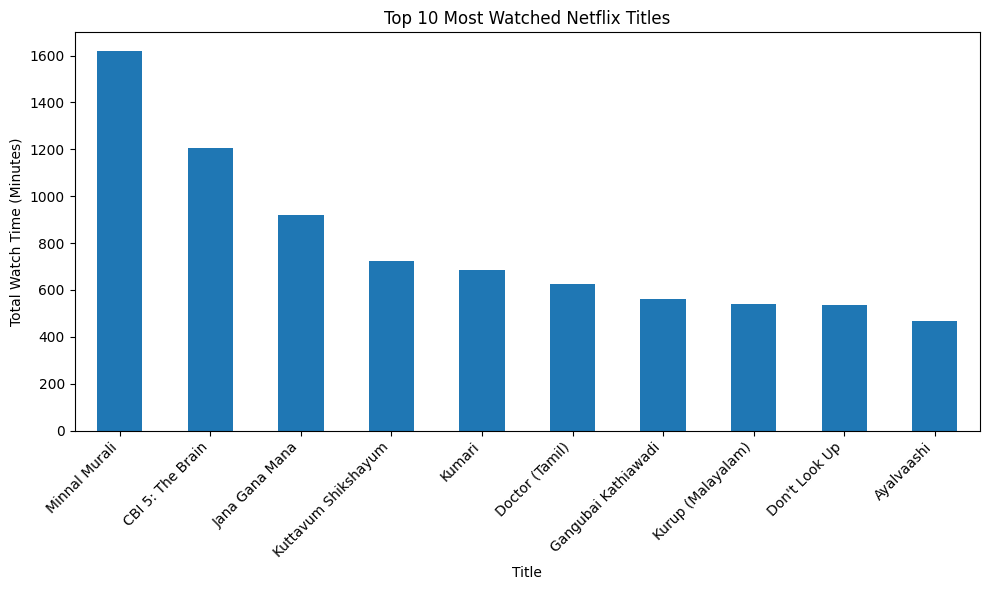

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_title.plot(kind='bar')## we did grp by so used this way
plt.title('Top 10 Most Watched Netflix Titles')
plt.xlabel('Title')
plt.ylabel('Total Watch Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
